In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

with tf.name_scope("Init"):
    a= [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.6, 8.0, 9.68, 10]         
    b = [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 15, 19, 29, 32]      
    x = tf.constant(arrayX, name='x', dtype=tf.float32)              
    y = tf.constant(arrayY, name='y', dtype=tf.float32)              


with tf.name_scope("Mean"):
    meanX = tf.reduce_mean(x, [0])
    meanY = tf.reduce_mean(y, [0]
                           
with tf.name_scope("Variance"):
    temp1= tf.subtract(x,meanX)
    temp1= tf.multiply(temp1,temp1)
    temp1= tf.reduce_sum(temp1)
    varianceX= tf.divide(temp1, len(arrayX))

    

n= len(arrayX)               
with tf.name_scope("Covariance"):
    temp1= tf.subtract(x,meanX)
    temp2= tf.subtract(y,meanY)
    covarianceXY = tf.reduce_sum(tf.multiply(temp1,temp2))
    covarianceXY = tf.divide(covarianceXY, n-1)


with tf.name_scope("m-VALUE"):
    m = tf.divide(covarianceXY,varianceX)


with tf.name_scope("c_value"):
    c= tf.subtract(meanY,tf.multiply(m,meanX))

    
with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp/tboard/output664444", sess.graph)
    print(sess.run(m))
    print(sess.run(c))
    writer.close()

3.43895
-5.65442


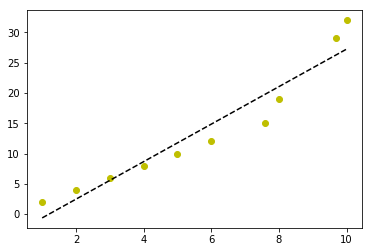

In [22]:


npX= np.asarray(a)
npY= np.asarray(b)

GraphFit= np.polyfit(npX,npY,1)
fitFunc= np.poly1d(GraphFit)      
plt.plot(npX,npY, 'yo', npX, fitFunc(npX), '--k')                    
plt.show()

In [23]:


#RMS Error
with tf.name_scope("Root_Mean_Square_error"):    
    rmse= tf.sqrt(tf.reduce_mean(tf.squared_difference(a,b)))      
    
    with tf.Session() as sess:
        print(sess.run(rmse))

10.602
